# Métricas
---
Las metricas utilizadas en *Forescast data driven models* son diferentes a las utilizadas en otras áreas de *Deep learning*.

## latitude-weighted Root Mean Square Error (RMSE)
---
Se calculas para cada varaible para un nivel verical dado (i.e. $T500$ temperatura a 500 m de altura $RMSE_{500}$).

Es el RMSE pero promediado a traves de las dimensiones:
> * Longitud $j$: $[1, \ldots, J]$ 
> * Latitud: $i$: $[1, \ldots, I]$
> * Tiempo: $t$: $[1, \ldots, T]$

$$

\mathrm{RMSE}_l=\sqrt{\frac{1}{T I J} \sum_t^T \sum_i^I \sum_j^J w(i)\left(f_{t, i, j}-o_{t, i, j}\right)^2}

$$

> **Donde:**
> * $f$: Forecast 
> * $o$: Ground truth (ERA 5) 
> * $w$: Latitud weights 

**Latitud weights:** Debido a que las celdas en altas latitudes son mas pequeñas comparadas con las de bajas latitudes se pondera el error de la siguiente forma:

$$

w(i)=\frac{\sin \theta_i^{\mathrm{u}}-\sin \theta_i^{\mathrm{l}}}{\frac{1}{I} \sum_i^I\left(\sin \theta_i^{\mathrm{u}}-\sin \theta_i^{\mathrm{l}}\right)}

$$

Donde $θ^u_i$ and $θ^l_i$ indican los límites superior e inferior de la celda con indice de latitud $i$ respectivamente.

In [ ]:
# !pip install git+https://github.com/google-research/weatherbench2.git

In [1]:
import xarray as xr
from weatherbench2 import metrics

In [2]:
data_dir = "C:\\Users\\gcuervo\\OneDrive - Universidad de Las Palmas de Gran Canaria\\Documents\\Doctorado\\DB\\GraphCast_data\\"

In [4]:
ground_truth = (xr.load_dataset(data_dir + "eval_targets.nc")
                .isel(time=slice(0,6))
                .rename({'lon': 'longitude','lat': 'latitude'})
                )
ground_truth

<xarray.Dataset>
Dimensions:                  (batch: 1, time: 6, latitude: 181, longitude: 360,
                              level: 13)
Coordinates:
  * longitude                (longitude) float32 0.0 1.0 2.0 ... 358.0 359.0
  * latitude                 (latitude) float32 -90.0 -89.0 -88.0 ... 89.0 90.0
  * time                     (time) timedelta64[ns] 06:00:00 ... 1 days 12:00:00
  * level                    (level) int32 50 100 150 200 ... 700 850 925 1000
Dimensions without coordinates: batch
Data variables:
    2m_temperature           (batch, time, latitude, longitude) float32 248.3...
    mean_sea_level_pressure  (batch, time, latitude, longitude) float32 9.983...
    10m_v_component_of_wind  (batch, time, latitude, longitude) float32 -0.04...
    10m_u_component_of_wind  (batch, time, latitude, longitude) float32 0.048...
    total_precipitation_6hr  (batch, time, latitude, longitude) float32 7.443...
    temperature              (batch, time, level, latitude, longitude) float32 ...
    geopotential             (batch, time, level, latitude, longitude) float32 ...
    u_component_of_wind      (batch, time, level, latitude, longitude) float32 ...
    v_component_of_wind      (batch, time, level, latitude, longitude) float32 ...
    vertical_velocity        (batch, time, level, latitude, longitude) float32 ...
    specific_humidity        (batch, time, level, latitude, longitude) float32 ...

### Pretrained
---

In [14]:
forecast = xr.load_dataset(data_dir + "predictions.nc").rename({'lon': 'longitude','lat': 'latitude'})
forecast

<xarray.Dataset>
Dimensions:                  (time: 6, batch: 1, latitude: 181, longitude: 360,
                              level: 13)
Coordinates:
  * time                     (time) timedelta64[ns] 06:00:00 ... 1 days 12:00:00
  * longitude                (longitude) float32 0.0 1.0 2.0 ... 358.0 359.0
  * latitude                 (latitude) float32 -90.0 -89.0 -88.0 ... 89.0 90.0
  * level                    (level) int32 50 100 150 200 ... 700 850 925 1000
Dimensions without coordinates: batch
Data variables:
    10m_u_component_of_wind  (time, batch, latitude, longitude) float32 -0.37...
    10m_v_component_of_wind  (time, batch, latitude, longitude) float32 -0.28...
    2m_temperature           (time, batch, latitude, longitude) float32 247.8...
    geopotential             (time, batch, level, latitude, longitude) float32 ...
    mean_sea_level_pressure  (time, batch, latitude, longitude) float32 9.95e...
    specific_humidity        (time, batch, level, latitude, longitude) float32 ...
    temperature              (time, batch, level, latitude, longitude) float32 ...
    total_precipitation_6hr  (time, batch, latitude, longitude) float32 6.125...
    u_component_of_wind      (time, batch, level, latitude, longitude) float32 ...
    v_component_of_wind      (time, batch, level, latitude, longitude) float32 ...
    vertical_velocity        (time, batch, level, latitude, longitude) float32 ...

In [21]:
RMSE_level = (metrics.MSE().compute(forecast, ground_truth))**0.5
RMSE_level

<xarray.Dataset>
Dimensions:                  (level: 13, batch: 1)
Coordinates:
  * level                    (level) int32 50 100 150 200 ... 700 850 925 1000
Dimensions without coordinates: batch
Data variables:
    10m_u_component_of_wind  (batch) float32 4.279
    10m_v_component_of_wind  (batch) float32 4.882
    2m_temperature           (batch) float32 4.227
    geopotential             (batch, level) float32 491.4 602.6 ... 531.4 556.1
    mean_sea_level_pressure  (batch) float32 713.2
    specific_humidity        (batch, level) float32 6.378e-08 ... 0.001644
    temperature              (batch, level) float32 1.916 2.407 ... 3.856 3.685
    total_precipitation_6hr  (batch) float32 0.002875
    u_component_of_wind      (batch, level) float32 4.056 6.724 ... 6.144 4.712
    v_component_of_wind      (batch, level) float32 4.411 7.021 ... 7.035 5.482
    vertical_velocity        (batch, level) float32 0.0131 0.03589 ... 0.1173

In [81]:
RMSE_time_level = (metrics.MSE().compute_chunk(forecast, ground_truth))**0.5
RMSE_time_level

<xarray.Dataset>
Dimensions:                  (time: 6, level: 13, batch: 1)
Coordinates:
  * time                     (time) timedelta64[ns] 06:00:00 ... 1 days 12:00:00
  * level                    (level) int32 50 100 150 200 ... 700 850 925 1000
Dimensions without coordinates: batch
Data variables:
    10m_u_component_of_wind  (time, batch) float32 4.425 4.34 ... 4.213 4.228
    10m_v_component_of_wind  (time, batch) float32 4.913 4.992 ... 4.795 4.796
    2m_temperature           (time, batch) float32 4.131 4.547 ... 4.099 4.168
    geopotential             (time, batch, level) float32 513.0 618.1 ... 534.1
    mean_sea_level_pressure  (time, batch) float32 730.5 740.9 ... 692.1 685.6
    specific_humidity        (time, batch, level) float32 7.848e-08 ... 0.001673
    temperature              (time, batch, level) float32 2.139 2.542 ... 3.642
    total_precipitation_6hr  (time, batch) float32 0.003083 ... 0.002547
    u_component_of_wind      (time, batch, level) float32 4.229 6.972 ... 4.705
    v_component_of_wind      (time, batch, level) float32 4.836 7.279 ... 5.425
    vertical_velocity        (time, batch, level) float32 0.01328 ... 0.1245

In [92]:
RMSE_T850 = RMSE_time_level['temperature'].sel(level=850)
# Por que  RMSE parece disminuir y no aumentar?
# Puede ser que la coord de tiempo este invertida?
RMSE_T850['time'] = RMSE_T850.time[::-1]
RMSE_T850 = RMSE_T850.to_pandas()
RMSE_T850

batch,0
time,
1 days 12:00:00,3.776628
1 days 06:00:00,3.686496
1 days 00:00:00,3.719813
0 days 18:00:00,3.586389
0 days 12:00:00,3.641057
0 days 06:00:00,3.647254


<Axes: xlabel='time'>

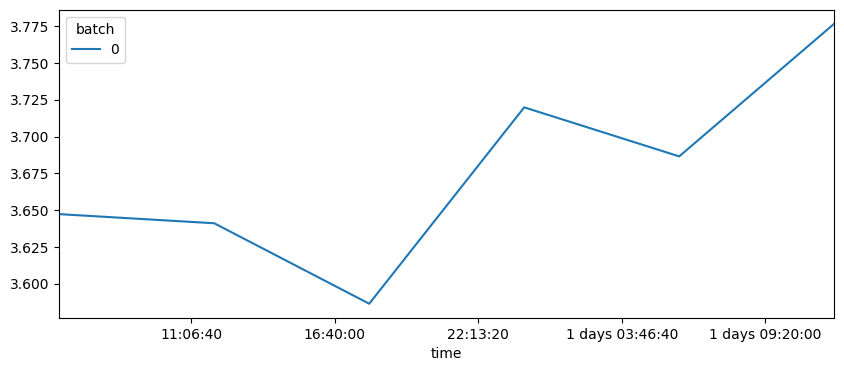

In [93]:
RMSE_T850.plot(figsize=(10, 4))

### Post-trained
---


In [3]:
post_train_forecast = xr.load_dataset(data_dir + "post_train.nc").rename({'lon': 'longitude','lat': 'latitude'})
post_train_forecast

c:\Users\gcuervo\miniconda3\envs\art1_pyenv\Lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


<xarray.Dataset>
Dimensions:                  (time: 12, batch: 1, latitude: 181,
                              longitude: 360, level: 13)
Coordinates:
  * time                     (time) timedelta64[ns] 0 days 06:00:00 ... 3 day...
  * longitude                (longitude) float32 0.0 1.0 2.0 ... 358.0 359.0
  * latitude                 (latitude) float32 -90.0 -89.0 -88.0 ... 89.0 90.0
  * level                    (level) int32 50 100 150 200 ... 700 850 925 1000
Dimensions without coordinates: batch
Data variables:
    10m_u_component_of_wind  (time, batch, latitude, longitude) float32 0.143...
    10m_v_component_of_wind  (time, batch, latitude, longitude) float32 -0.16...
    2m_temperature           (time, batch, latitude, longitude) float32 248.8...
    geopotential             (time, batch, level, latitude, longitude) float32 ...
    mean_sea_level_pressure  (time, batch, latitude, longitude) float32 9.982...
    specific_humidity        (time, batch, level, latitude, longitude) float32 ...
    temperature              (time, batch, level, latitude, longitude) float32 ...
    total_precipitation_6hr  (time, batch, latitude, longitude) float32 0.000...
    u_component_of_wind      (time, batch, level, latitude, longitude) float32 ...
    v_component_of_wind      (time, batch, level, latitude, longitude) float32 ...
    vertical_velocity        (time, batch, level, latitude, longitude) float32 ...

In [5]:
RMSE_time_level_posttrain = (metrics.MSE().compute_chunk(post_train_forecast, ground_truth))**0.5
RMSE_time_level_posttrain

<xarray.Dataset>
Dimensions:                  (time: 6, level: 13, batch: 1)
Coordinates:
  * time                     (time) timedelta64[ns] 06:00:00 ... 1 days 12:00:00
  * level                    (level) int32 50 100 150 200 ... 700 850 925 1000
Dimensions without coordinates: batch
Data variables:
    10m_u_component_of_wind  (time, batch) float32 0.6392 0.7297 ... 1.028 1.082
    10m_v_component_of_wind  (time, batch) float32 0.6571 0.7642 ... 1.04 1.105
    2m_temperature           (time, batch) float32 0.5506 0.6558 ... 0.8374
    geopotential             (time, batch, level) float32 64.72 47.3 ... 58.85
    mean_sea_level_pressure  (time, batch) float32 40.89 44.45 ... 69.68 75.98
    specific_humidity        (time, batch, level) float32 2.4e-08 ... 0.000514
    temperature              (time, batch, level) float32 0.7214 ... 0.7567
    total_precipitation_6hr  (time, batch) float32 0.0007606 ... 0.001617
    u_component_of_wind      (time, batch, level) float32 1.292 1.463 ... 1.176
    v_component_of_wind      (time, batch, level) float32 1.328 1.493 ... 1.21
    vertical_velocity        (time, batch, level) float32 0.01024 ... 0.03796

In [9]:
RMSE_T850_post = RMSE_time_level_posttrain['temperature'].sel(level=850)

RMSE_T850_post = RMSE_T850_post.to_pandas()
RMSE_T850_post

batch,0
time,
0 days 06:00:00,0.515984
0 days 12:00:00,0.543651
0 days 18:00:00,0.668003
1 days 00:00:00,0.694443
1 days 06:00:00,0.774837
1 days 12:00:00,0.793327


<Axes: xlabel='time'>

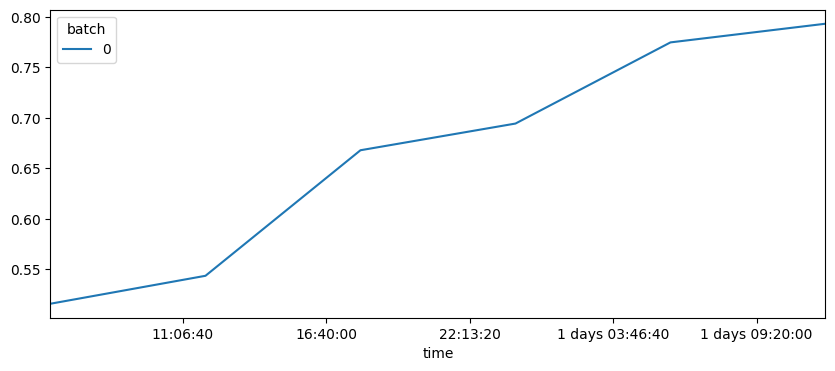

In [10]:
RMSE_T850_post.plot(figsize=(10, 4))

El error es mucho menor porque se ha entrenado mucho más el modelo GraphCast a partir de los checkpoint.